



Hiearchial Clustering

# a. Import required Library (2 marks)



In [2]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder


# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

# Inference:
Importing the required python libaries for  project:
- numpy, pandas,matplotlib,seaborn is used for the data manipulation and data visulaisation .
- The sklearn LabelEncoder,standardscalar Libaries is used for encoding and data preprocessing purpose.
- AgglomerativeClustering,silhouette_score,euclidean_distances,linkage, dendrogram,cophenet is a set of libaries used for building the Hiearchical clustering model and To evaluate the performance  of the model.

# b. Read the dataset (tab, csv, xls, txt, inbuilt dataset). (1 mark)

In [3]:
df = pd.read_csv('MPA-1_forestfires.csv') 

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Inference:
- pd.read_csv is function from pandas used to read the given forestfire.csv dataset.
- df.head() - It displays the first 4 rows of the dataset.

# c. Perform explanotory data analysis on the dataset. (3 marks)

## Understanding the data

In [5]:
df.shape

(517, 13)

In [6]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [8]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Checking Missing Value

In [9]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

# Dropping the insignificant columns

In [10]:
df1=df.copy(deep=True)
df1.drop('X',axis=1,inplace=True)
df1.drop('Y',axis=1,inplace=True)
df1.drop('month',axis=1,inplace=True)
df1.drop('day',axis=1,inplace=True)

In [11]:
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Checking the Outlier and Removing the outlier

FFMC


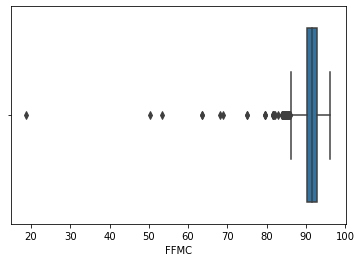

DMC


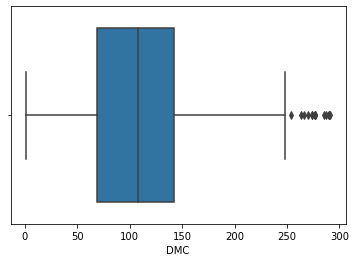

DC


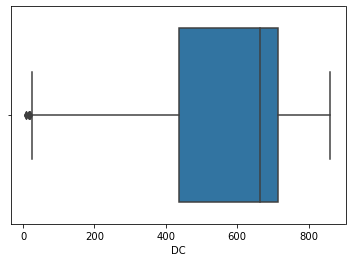

ISI


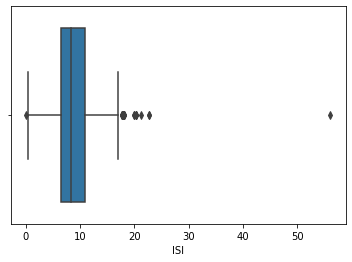

temp


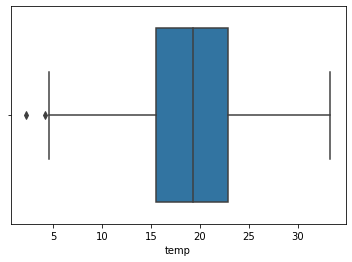

RH


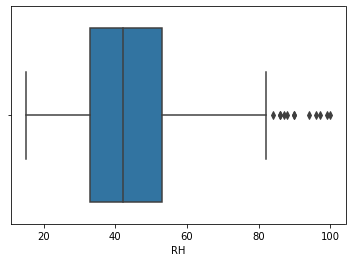

wind


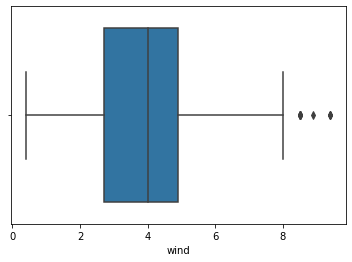

rain


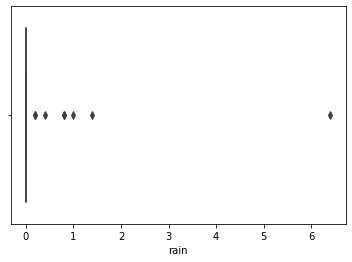

area


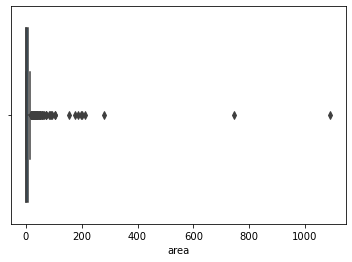

In [12]:
d1=df1.select_dtypes(exclude="object")
for i in d1.columns:
    print(i)
    sns.boxplot(x=d1[i]) #here x is assgined to plot the graph horizontally
    plt.show() #plotting each plot and displaying individually

In [13]:
#Removing the outlier
# calculate the first quartile
Q1 = df1.quantile(0.25)

# calculate the third quartile
Q3 = df1.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df1.shape

(356, 9)

In [14]:
#takeing copy to plot pairplot
df2=df1.copy(deep=True)

# Skewness and Log Transformation

In [15]:
#Before applying transformation
df1.skew()

FFMC   -0.363474
DMC     0.352114
DC     -1.368553
ISI     0.728804
temp   -0.025334
RH      0.656115
wind    0.310008
rain    0.000000
area    1.962128
dtype: float64

FFMC


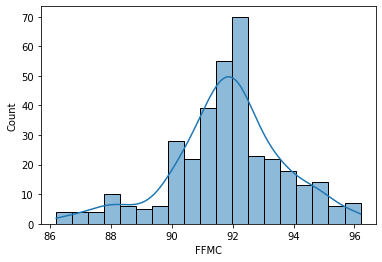

DMC


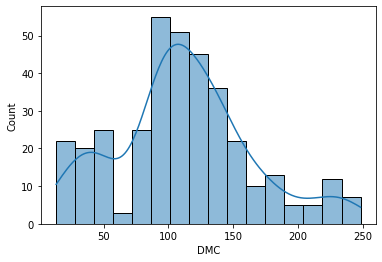

DC


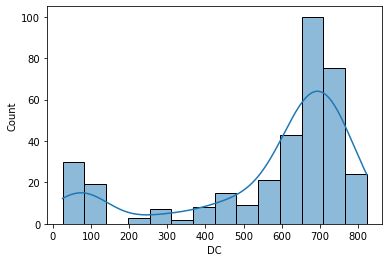

ISI


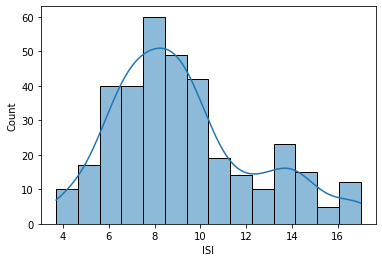

temp


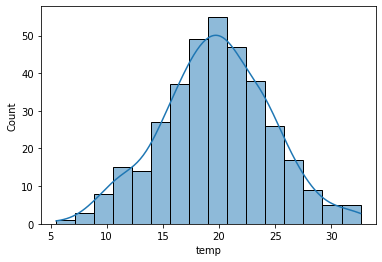

RH


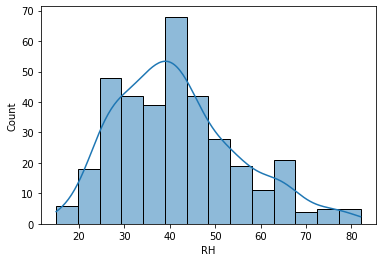

wind


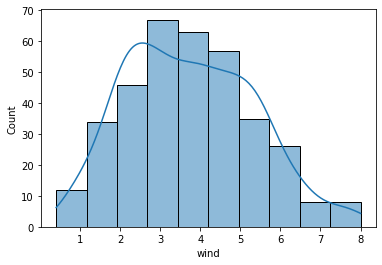

rain


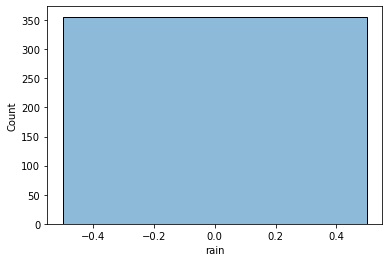

area


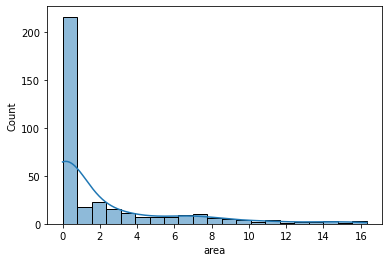

In [16]:
for i in df1.columns:
    print(i)
    sns.histplot(df1[i],kde=True)
    plt.show()

In [17]:
# Log transformation on all column
df_log= np.log1p(df1)


In [18]:
#After transformation
df_log.skew()

FFMC   -0.438831
DMC    -1.195369
DC     -2.044022
ISI     0.028981
temp   -0.845942
RH     -0.102785
wind   -0.430123
rain    0.000000
area    0.937384
dtype: float64

FFMC


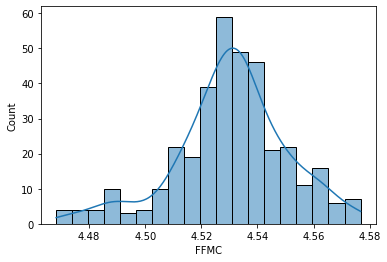

DMC


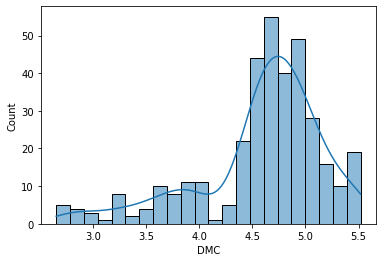

DC


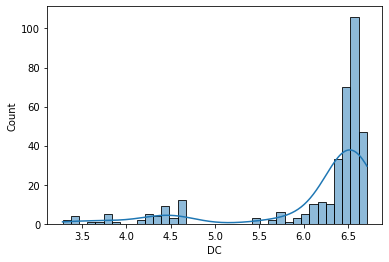

ISI


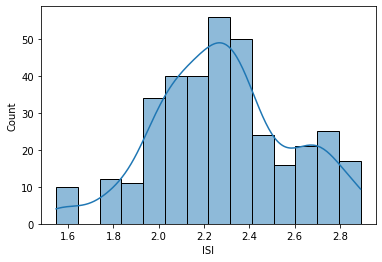

temp


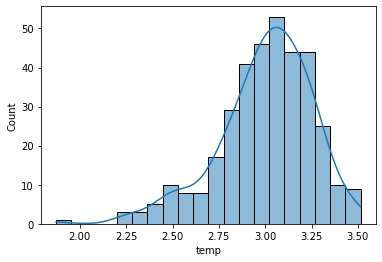

RH


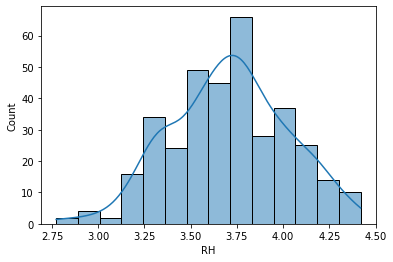

wind


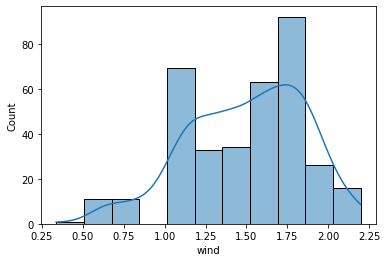

rain


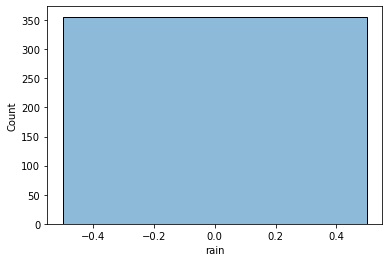

area


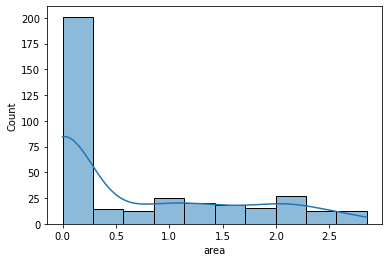

In [19]:
for i in df1.columns:
    print(i)
    sns.histplot(df_log[i],kde=True)
    plt.show()

In [20]:
print(df_log.shape)

(356, 9)


In [21]:
df_log

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,4.468204,3.303217,4.557030,1.808289,2.219203,3.951244,2.041220,0.0,0.000000
1,4.517431,3.594569,6.507427,2.041220,2.944439,3.526361,0.641854,0.0,0.000000
2,4.517431,3.799974,6.533643,2.041220,2.747271,3.526361,0.832909,0.0,0.000000
5,4.535820,4.457830,6.192362,2.753661,3.144152,3.401197,1.856298,0.0,0.000000
6,4.535820,4.498698,6.207785,2.251292,3.222868,3.332205,1.410987,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
505,4.521789,5.101085,6.613921,2.406945,3.321432,3.583519,1.029619,0.0,1.916923
507,4.521789,5.123369,6.624862,2.091864,3.292126,3.737670,1.526056,0.0,0.000000
508,4.521789,5.123369,6.624862,2.091864,3.292126,3.737670,1.526056,0.0,0.000000
510,4.521789,5.123369,6.624862,2.091864,2.954910,4.143135,1.856298,0.0,0.357674


# Scaling

In [22]:
# instantiate the 'StandardScaler'
scaler = StandardScaler()

# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
# name the standardized data as 'features_scaled'
transform_inp = pd.DataFrame(scaler.fit_transform(df_log),columns=df_log.columns)


In [23]:
# Final input which we are going to use built model
transform_inp

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-3.119854,-2.154108,-1.948739,-1.613206,-3.087237,0.782780,1.523997,0.0,-0.760969
1,-0.656247,-1.663939,0.440405,-0.821388,-0.224180,-0.577005,-2.384542,0.0,-0.760969
2,-0.656247,-1.318367,0.472519,-0.821388,-1.002553,-0.577005,-1.850910,0.0,-0.760969
3,0.264039,-0.211593,0.054466,1.600451,0.564240,-0.977574,1.007494,0.0,-0.760969
4,0.264039,-0.142837,0.073358,-0.107280,0.874991,-1.198377,-0.236294,0.0,-0.760969
...,...,...,...,...,...,...,...,...,...
351,-0.438182,0.870617,0.570855,0.421841,1.264100,-0.394077,-1.301483,0.0,1.394768
352,-0.438182,0.908106,0.584257,-0.649232,1.148406,0.099263,0.085104,0.0,-0.760969
353,-0.438182,0.908106,0.584257,-0.649232,1.148406,0.099263,0.085104,0.0,-0.760969
354,-0.438182,0.908106,0.584257,-0.649232,-0.182842,1.396904,1.007494,0.0,-0.358735


<AxesSubplot:>

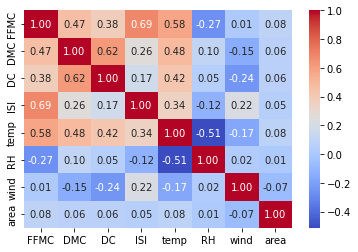

In [24]:
# Correlation
numerical= ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','area']
corr = df1[numerical].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

# Inference:
- <b> Data Understanding</b>:<br> 
 i)  <df.shape :  It is used get the information about the number of rows and columns.  The "forestfire" dataset contains 517 rows/records and 13 columns.<br>
 ii) df.columns: df.columns function is used to display the column names from the dataset.  The forest fire dataset contains 13 columns namely 'X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area' <br>
  where, 1.  X and Y are spatial cooridnates of the forest fires.
              2.  month and day columns represent the month and day on which the forest fires occurred.
              3.  FFMC,DMC,ISI,RH -  fuel moisture content, drought code, and the initial spread index, relative humidity respectively.
              4. temp, wind, and rain columns are the meteorological features or environmental variables that could influence the occurrence and spread of the fires.
              5. area column denotes the burned area (in hectares) due to the forest fire.<br>
 iii) df.info(): It gives the information about the dataset like column names, datatype,null values memory etc. The forestfire datset has 8 float columns, 3 intege columns and 2 objects columns. The column "day" and "month" are categorical column and all other columns are numerical. <br> 
 iv) df.describe(): describe methods gives statstical information about the data .The dataset could be useful in identifying the factors contributing to forest fires and predicting the area of damage based on various environmental factors. The maximum spread of area affected by forest fire is 1090.84 and the maximum temperature is 33.3 degree celcius.<br>
 v) df.isnull.sum(): isnull().sum() is used  identify the presence of null value in the dataset. The forestfire dataset does not contains any null value.<br>
- <b> Dropping Insignificant columns</b>:<br> 
i) df1.drop() is a function used to drop the insignificant columns. The columns X,Y,day,month are dropped from the dataset since the month and day column is a categorical , X and Y is about the spatial  cooridnates of forest fire .The X and Y column contains unique values and These column are not significant towards the final outcome or Target variable. so , we dropped these column for further analysis .
- <b> Checking and Removing Outliers</b>:<br> 
i) We used Boxplot to identify the presence of outlier the results shows the outliers are present in all the variables of forestfire dataset. we used df.drop() function to remove the outliers from all the column . After removing the outliers from the dataset, the number of rows decreased from 517 to 356. This indicates that there were significant outliers present in the data. Cluster analysis and outlier detection are strongly coupled tasks in data mining area. Cluster structure can be easily destroyed by few outliers so,The removal of outliers helps to create a more reliable and robust model.
- <b> Checking the Skewness and applying Log transformation</b>:<br> 
i)df.skew() is the function used to check the skewness of the data. The FFMC,DMC,temp are negatively or left skewed and other columns are positively skewed. The area column is has more skeweness than other column which is greater than 1. so to reduce the skewness of the data, we applied Log transformation on 'df'. Log transformation can be used for Right skewed data.np.log(df) is function used to apply log transformation. we used histogram to see the distribution of the data.
- <b> Scaling</b>:<br>
i) Scaling is very important in clustering since many features in the dataset  have different scale and that will results in non-uniform distribution. In clustering, scaling factor is used to convert different variables to one scale in order to perform meaningful analysis. Here, we used standard scalar for forestfire dataset. Standard scalar transforms the data by z-score. It will transform the data to have mean 0 and S.D. as 1. StandardScaler()  is a function from sklearn.preprocessing libary used to implement standard scalar on the 'df'.
- <b> Correlation matrix</b>:<br>
i) we creates a heatmap to explore the correlations among the numerical variables in the dataset.<br>
ii) Each cell in the heatmap represents the correlation coefficient between two variables. Correlation coefficients range from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.<br>
iii)The heatmap uses a color scale to represent the magnitude of the correlation coefficients. The cooler colors (e.g., blue) represent negative correlations, and the warmer colors (e.g., red) represent positive correlations.<br>
iv) The column  "DC" and "wind" , "temp" and "RH","RH" and "FFMC" has negative correlation and rest of all other columns have positive correlation.<br>

- "transform_inp" is a transformed and scaled dataframe which we will be using for building the agglormative clustering model and for further analysis.

 

# d. Plot the datapoints using Scatter Plot. (3 marks)

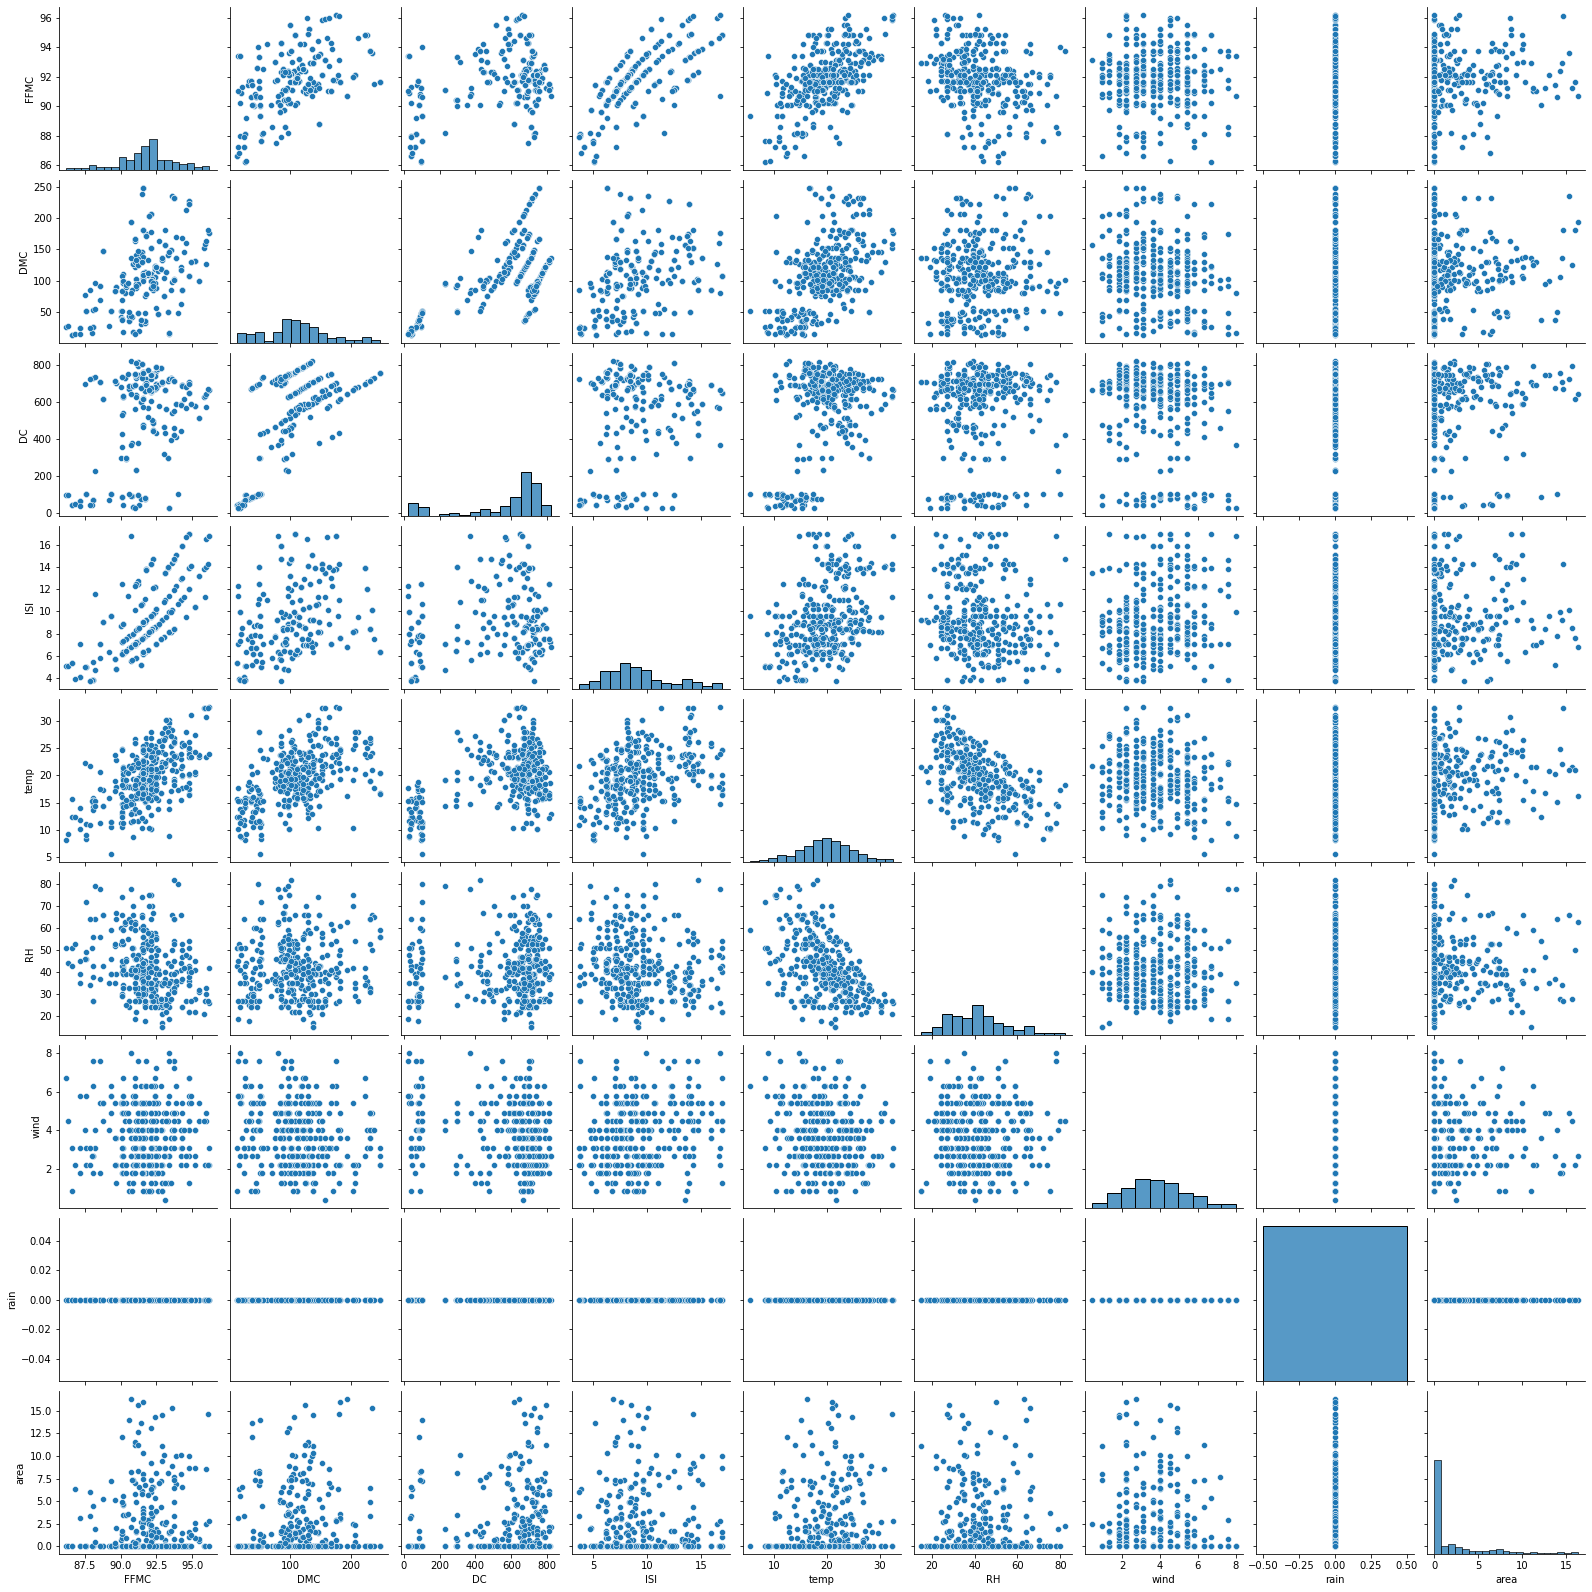

In [25]:
# Actual/original data distribution
sns.pairplot(df2)

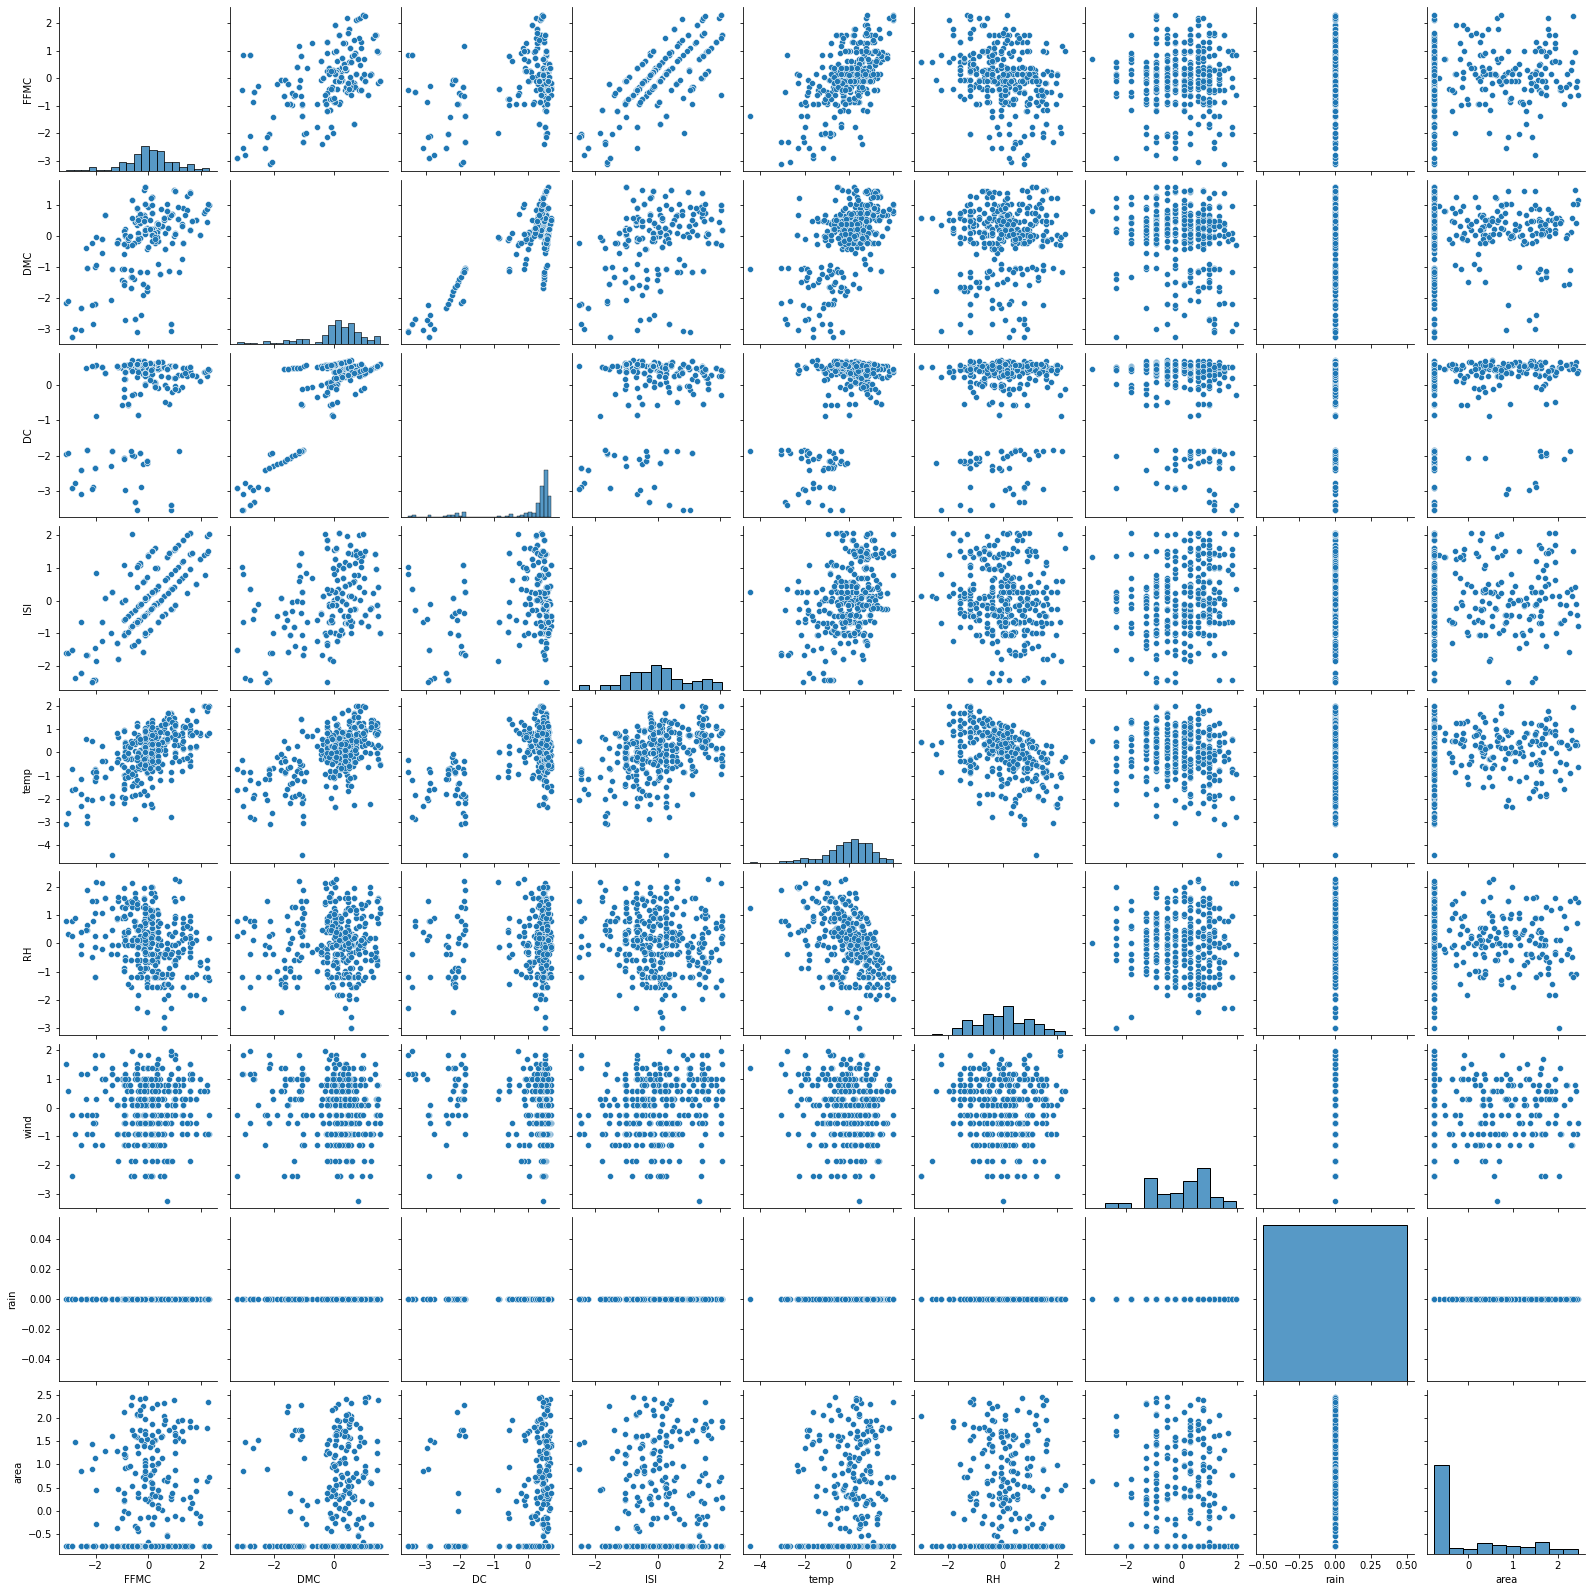

In [26]:
# Pair plot for scaled data.
sns.pairplot(transform_inp)

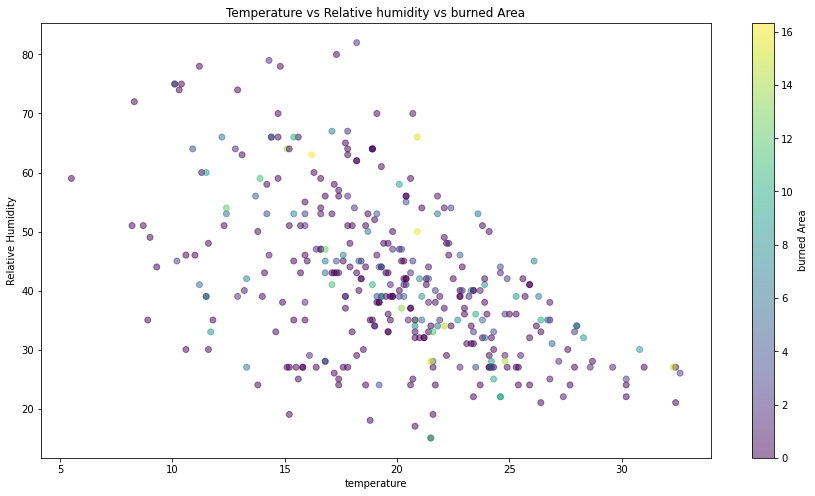

In [27]:
plt.figure(figsize=(15,8))
plt.scatter(df1['temp'], df1['RH'],c=df1['area'], alpha=0.5)
plt.colorbar(label='burned Area')
plt.xlabel('temperature')
plt.ylabel('Relative Humidity')
plt.title('Temperature vs Relative humidity vs burned Area')
plt.show()

# Inference:
- <b>Pair Plot</b> - Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. 
- The diaganol of pairplot contains the histogram that shows the distribution of data
- <b>Scatter plot</b> : This chart is commonly used to show the results of some clustering analysis since it can exhibit the data points' positions and help distinguish each cluster. It is also used to show the linear relationship between two variables.
- From the scatter plot, we can see that there is a cluster of data points with area=0, which suggests that most forest fires have an area of 0. The few data points with a larger area are scattered and widely dispersed, indicating that forest fires with a large area are relatively rare.
- We can also observe some correlation between temperature and humidity, which is expected as higher temperatures tend to lower the relative humidity.
- sns.pairplot().plt.scatter() is used to plot the pairplot and scatter plot for the given dataset.
- As we can see in pairplot, The 'temp' and 'ISI has positive relationship.
- Sactter plot shows the clusters. The variable 'DC' and 'FFMC' shows well density and distinct clusters in scatter plot.

# e. Apply five methods of agglomerative hierachial clustering. [Single, complete, average, centroid and ward's linkage method] (2 marks)

In [28]:
Z1 = linkage(transform_inp, method='single', metric='euclidean')
Z2 = linkage(transform_inp, method='complete', metric='euclidean')
Z3 = linkage(transform_inp, method='average', metric='euclidean')
Z4 = linkage(transform_inp, method='ward', metric='euclidean')
Z5 = linkage(transform_inp, method='centroid', metric='euclidean')

# Inference:
- Similarity between the clusters can be measured using various Linkage method.
- The Linkage method used for 'forestfire" dataset are single,complete,average,ward,centroid.
- linkage() is the function imported from  scipy.cluster library.
- The metric used for the linkage method is euclidean distance.
- Z1,Z2,Z3,Z4,Z5 are the linkage matrix calculated for different linkage method. we fit the "transform_inp" in the linkage method.


# f. Draw dendrogram for the above five clustering methods. (2 marks)

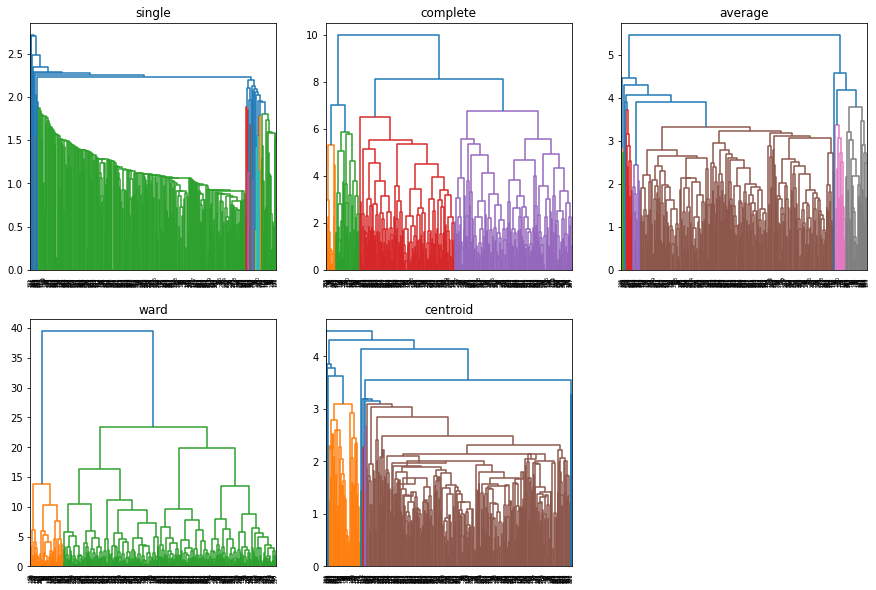

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1), dendrogram(Z1), plt.title('single')
plt.subplot(2,3,2), dendrogram(Z2), plt.title('complete')
plt.subplot(2,3,3), dendrogram(Z3), plt.title('average')
plt.subplot(2,3,4), dendrogram(Z4), plt.title('ward')
plt.subplot(2,3,5),dendrogram(Z5),plt.title('centroid')
plt.show()

# Inference:
-  Dendrogram is very useful technique to visualise the clusters.
- Using dendrogram we can decide the optimal number of clusters for different linkage methods.
- Here, Different linkage method results in the formation of different dendrogram.
- The x-axis represent the the data points and Y-axis represent the distance.
- The horizontal line is known as clade thar represent the merging of clusters.
- Here, we are performing the Agglormative clustering for Forestfire dataset where each data point is considered as single cluster and merging happens recursively based on closest distance of clusters.
- The number of clusters depends on the  height at which dendrogram is being cut
- Here, the ward linkage shows 2 clusters in dendrogram and other linkage method shows more than two clusters.

# g. Calculate Cophenet Coorelation coefficient for the above five methods. (4 marks)

In [30]:
#SINGLE
from scipy.spatial.distance import pdist
plt.figure(figsize=[10,10])
c,coph_dists=cophenet(Z1,pdist(transform_inp))
print("cophentic score for single linkage" , c)

cophentic score for single linkage 0.731328534649177


<Figure size 720x720 with 0 Axes>

In [31]:
#COMPLETE
plt.figure(figsize=[10,10])
c,coph_dists=cophenet(Z2,pdist(transform_inp))
print("cophentic score for complete linkage", c)

cophentic score for complete linkage 0.6422900678161826


<Figure size 720x720 with 0 Axes>

In [32]:
#AVERAGE
plt.figure(figsize=[10,10])
c,coph_dists=cophenet(Z3,pdist(transform_inp))
print("cophentic score for Average linkage",c)

cophentic score for Average linkage 0.7634925119886535


<Figure size 720x720 with 0 Axes>

In [33]:
#WARD
plt.figure(figsize=[10,10])
c,coph_dists=cophenet(Z4,pdist(transform_inp))
print("cophentic score for ward linkage",c)

cophentic score for ward linkage 0.6964783024162133


<Figure size 720x720 with 0 Axes>

In [34]:
#CENTROID
plt.figure(figsize=[10,10])
c,coph_dists=cophenet(Z5,pdist(transform_inp))
print("cophentic score for centroid linkage",c)

cophentic score for centroid linkage 0.7596610340362577


<Figure size 720x720 with 0 Axes>

# Sihouttee score

ward


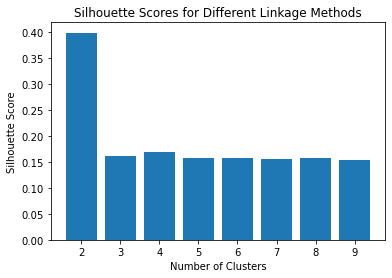

complete


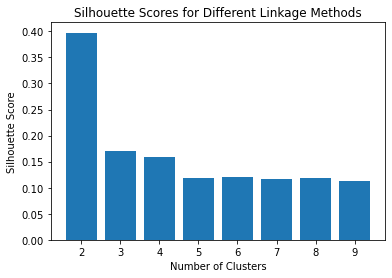

average


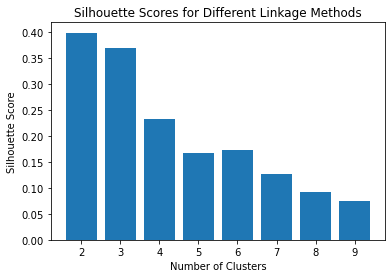

single


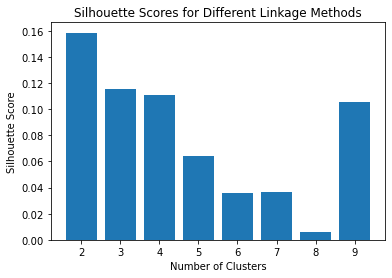

In [35]:
# Define range of cluster numbers to test
K = range(2, 10)

# Define linkage methods to test
linkage_methods = ['ward', 'complete', 'average', 'single']

# Calculate silhouette scores for each method and number of clusters
silhouette_scores = {}
for method in linkage_methods:
    scores = []
    for k in K:
        # Initialize Agglomerative Clustering algorithm
        clustering = AgglomerativeClustering(n_clusters=k, linkage=method)
        # Fit the algorithm on data and get cluster labels
        labels = clustering.fit_predict(transform_inp)
        # Calculate silhouette score
        score = silhouette_score(transform_inp, labels)
        scores.append(score)
    silhouette_scores[method] = scores

# Plot the results
for method, scores in silhouette_scores.items():
    print(method)
    plt.bar(K, scores)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Scores for Different Linkage Methods")
    plt.show()

In [35]:
K = range(2, 7)  # number of clusters to try
linkage_methods = ['ward', 'complete', 'average', 'single']  # linkage methods to try

silhouette_scores = []  # list to store silhouette scores

# Iterate over each linkage method
for method in linkage_methods:
    scores = []
    # Iterate over each number of clusters
    for k in K:
        # Create clustering object and fit to data
        clustering = AgglomerativeClustering(n_clusters=k, linkage=method)
        labels = clustering.fit_predict(transform_inp)
        
        # Calculate silhouette score and append to list
        score = silhouette_score(transform_inp, labels)
        scores.append(score)
        
    # Append list of scores for current linkage method to silhouette_scores
    silhouette_scores.append(scores)
    
    # Print results for current linkage method
    print(f"Linkage method: {method}")
    for k, score in zip(K, scores):
        print(f"Number of clusters: {k}: Silhouette score: {score:.3f}")
    print()

Linkage method: ward
Number of clusters: 2: Silhouette score: 0.399
Number of clusters: 3: Silhouette score: 0.162
Number of clusters: 4: Silhouette score: 0.168
Number of clusters: 5: Silhouette score: 0.159
Number of clusters: 6: Silhouette score: 0.157

Linkage method: complete
Number of clusters: 2: Silhouette score: 0.397
Number of clusters: 3: Silhouette score: 0.170
Number of clusters: 4: Silhouette score: 0.158
Number of clusters: 5: Silhouette score: 0.119
Number of clusters: 6: Silhouette score: 0.121

Linkage method: average
Number of clusters: 2: Silhouette score: 0.399
Number of clusters: 3: Silhouette score: 0.370
Number of clusters: 4: Silhouette score: 0.233
Number of clusters: 5: Silhouette score: 0.167
Number of clusters: 6: Silhouette score: 0.174

Linkage method: single
Number of clusters: 2: Silhouette score: 0.159
Number of clusters: 3: Silhouette score: 0.116
Number of clusters: 4: Silhouette score: 0.111
Number of clusters: 5: Silhouette score: 0.064
Number of c

# Inference:
- <b> Cophentic  Correlation Coefficient</b>:<br> 
i) cophentic coefficient is the correation coefficient between cophentic distance and actual distance between the observations.<br>
ii) It quantifies how the dendrogram has represented the dissimilarites between the observations<br>
iii) It tells how well the linkage method represent datapoints in dendrogram.<br>
iv)The cophenetic score value >0.5 indicates the good linkage method.<br>
v) Higher the cophentic score  means your linkage method able to represent the datapoints well in dendrogram than in saptial space.<br>
vi) Here, in this project we calculated the cophentic coefficient for 5 linkage method namely single,complete,average,and ward.<br>
vii)cophenet() is function used to calculate cophenetic coefficient , to this method we will pass two parameters: i) linkage matrix ii) spatial or euclidean distance for our observations.<br>
viii) The cophenet() method returns two value i) cophentic coefficient (c) and ii) cophentic distance(coph_dists)). pdist() function is used to calculate the actual or spatial distance for our datapoints.<br>
ix) In our case for the "forestfire" dataset,  The  Average linkage method gives highest cophentic coefficient as 0.763  and the "Complete" linkage gives lowest scored as compared to other linkage method as 0.64.<br>
x) Based on this cophentic coefficient for forestfire dataset, we can say that the average linkage method represent the datapoints well in dendrogram and it is a good linkage as compared to other linkage method.<br>

- <b> Silhouette coefficient </b>:<br> 
i)Silhouette score is used to find the optimal number of clusters.<br>
ii) it will lies between -1 to 1<br>
iii) we calculate the silhouette score for different values "K". we  will select the 'K' which has highest silhouette score. <br>
iv) The 'K' with highest silhouette score is considered as optimal number of clusters.<br>
v) Here in this project, we used silhouette_score() function to calculate the silhouetee score for different K values (2,3,4,5,6). we passed "transform_inp" as a parameter to silhouette_score() method.<br>
vi)The silhouette score for all linkage method is high for the K=2. The average linkage silhouette score is also high for the K equals to 2.<br>
vii) Thus, we can decide the optimal number of clusters for forestfire dataset is 2.<br>



# h. Plot the best method labels using the scatter plot. (3 marks)

In [36]:
transform_inp.shape

(356, 9)

In [37]:
transform_inp

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-3.119854,-2.154108,-1.948739,-1.613206,-3.087237,0.782780,1.523997,0.0,-0.760969
1,-0.656247,-1.663939,0.440405,-0.821388,-0.224180,-0.577005,-2.384542,0.0,-0.760969
2,-0.656247,-1.318367,0.472519,-0.821388,-1.002553,-0.577005,-1.850910,0.0,-0.760969
3,0.264039,-0.211593,0.054466,1.600451,0.564240,-0.977574,1.007494,0.0,-0.760969
4,0.264039,-0.142837,0.073358,-0.107280,0.874991,-1.198377,-0.236294,0.0,-0.760969
...,...,...,...,...,...,...,...,...,...
351,-0.438182,0.870617,0.570855,0.421841,1.264100,-0.394077,-1.301483,0.0,1.394768
352,-0.438182,0.908106,0.584257,-0.649232,1.148406,0.099263,0.085104,0.0,-0.760969
353,-0.438182,0.908106,0.584257,-0.649232,1.148406,0.099263,0.085104,0.0,-0.760969
354,-0.438182,0.908106,0.584257,-0.649232,-0.182842,1.396904,1.007494,0.0,-0.358735


# Average

shape (356, 10)
1    308
0     48
Name: Cluster, dtype: int64


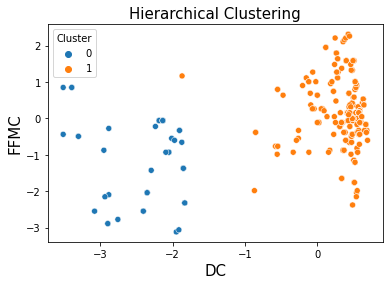

In [38]:
# instantiate clustering method with 2 clusters and 'AVERAGE' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='average')
d1=transform_inp.copy(deep=True)
# fit the model on the scaled data
clusters.fit(d1)
# add a column containing cluster number to the original data
d1['Cluster'] = clusters.labels_
print('shape',d1.shape)

b= d1['Cluster'].value_counts()
print(b)
sns.scatterplot(x = 'DC', y = 'FFMC', data = d1, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('DC', fontsize = 15)
plt.ylabel('FFMC', fontsize = 15)

# display the plot
plt.show()

# Ward

shape (356, 10)
0    308
1     48
Name: Cluster, dtype: int64


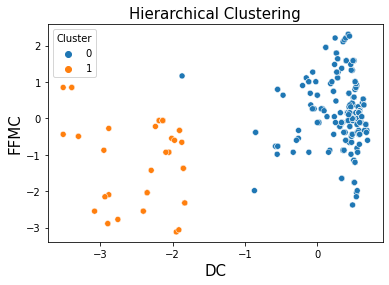

In [39]:
# instantiate clustering method with 2 clusters and 'Ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
d2=transform_inp.copy(deep=True)
# fit the model on the scaled data
clusters.fit(d2)
# add a column containing cluster number to the original data
d2['Cluster'] = clusters.labels_
print('shape',d2.shape)

b= d2['Cluster'].value_counts()
print(b)
sns.scatterplot(x = 'DC', y = 'FFMC', data = d2, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('DC', fontsize = 15)
plt.ylabel('FFMC', fontsize = 15)

# display the plot
plt.show()

# Single

shape (356, 10)
0    355
1      1
Name: Cluster, dtype: int64


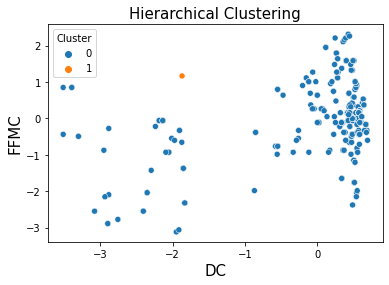

In [40]:
# instantiate clustering method with 2 clusters and 'Single' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='single')
d3=transform_inp.copy(deep=True)
# fit the model on the scaled data
clusters.fit(d3)
# add a column containing cluster number to the original data
d3['Cluster'] = clusters.labels_
print('shape',d3.shape)

b= d3['Cluster'].value_counts()
print(b)
sns.scatterplot(x = 'DC', y = 'FFMC', data = d3, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('DC', fontsize = 15)
plt.ylabel('FFMC', fontsize = 15)

# display the plot
plt.show()

# Complete

shape (356, 10)
0    307
1     49
Name: Cluster, dtype: int64


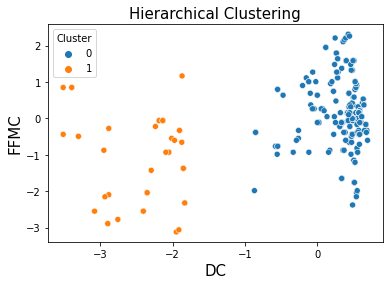

In [41]:
# instantiate clustering method with 2 clusters and 'complete' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='complete')
d4=transform_inp.copy(deep=True)
# fit the model on the scaled data
clusters.fit(d4)
# add a column containing cluster number to the original data
d4['Cluster'] = clusters.labels_
print('shape',d4.shape)

b= d4['Cluster'].value_counts()
print(b)
sns.scatterplot(x = 'DC', y = 'FFMC', data = d4, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('DC', fontsize = 15)
plt.ylabel('FFMC', fontsize = 15)

# display the plot
plt.show()

# Finalised/Best clustering Model
# Average

shape (356, 10)
1    308
0     48
Name: Cluster, dtype: int64


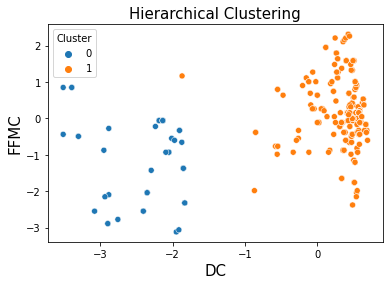

In [42]:
# instantiate clustering method with 2 clusters and 'AVERAGE' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='average')
d1=transform_inp.copy(deep=True)
# fit the model on the scaled data
clusters.fit(d1)
# add a column containing cluster number to the original data
d1['Cluster'] = clusters.labels_
print('shape',d1.shape)

b= d1['Cluster'].value_counts()
print(b)
sns.scatterplot(x = 'DC', y = 'FFMC', data = d1, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('DC', fontsize = 15)
plt.ylabel('FFMC', fontsize = 15)

# display the plot
plt.show()

# Inference:
- <b> Agglomerative clustering</b>:<br> 
i)  In this project, we are building hierarchy based clustering model. Agglomerative and Divisive clustering are the two types of hierarchical clustering<br>
ii) we consider the Agglomerative clustering because it is computoinally effective and it creates more balanced clusters than divisive method . <br>
iii) The main reason for going with Agglormative is the<b> number of clusters are not known so, we will identify the natural grouping in the "forestfire" dataset</b><br>
iv) In this method, each data point is considered as a single cluster and these clusters are grouped to form bigger clusters and eventually the single cluster of all the observations is created.<br>
v) we use AgglomerativeClustering() function to build the hiearchical clustering. we passed two parameter to this method <b>i) n_clusters = 2 is number of clusters  ii) linkage = "average"</b>  is a type linkage.<br>
vi) we fit our "transform_inp" data to this model .<br>
vii) clusters.labels_  will gives us the final clusters label for the given data.<br>
viii) we have build the Agglomerative hiearchical clustering Model for All 5 linkage method and plotted their cluster labels in <b>scatterplot (FFMC vs DC) </b>to visualize the clusters.<br>
ix)By comparing all the linkage methods agglomerative model scatter plots, we can see Average and centroid linkage give good distinct and cohesion cluster compare to single and complete. The single linkage method gives bad clusters having one observation  in one cluster and keeping all other observations in another clusters.<br>
x) By comparing the scatterplot visualisation of clusters, the cophentic coefficient and silhouetee score for all linkage method, The<b> Average linkage agglormative clustering model</b> has good <b>cophentic score =0.763 and silhouette score = 0.399 (K=2) </b> as compared to other linkage method model. So, we decided the <b>Average linkage agglormative clustering model </b> as final one.<br>
xi) Compare to all linkage method Average linkage method forms compact cluster and roboust to outliers. It balances between the single and complete linkage. Finally with Average clustering we got 2 clusters with labels as 0 and 1.  The cluster 0 is represented by blue color and the cluster 1 is represented by orange color in the scatter plot.
The number of observation in cluster 0 is 48 and the number of observations in cluster 1 is 308.


